In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data_21.csv")

In [3]:
data.head()

,Timestamp,CO (ppm),NO2 (ppm),CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy,Position
0,2023-08-21 11:30:49,32.4,0.1,3320.0,9.0,19.0,27.0,32.0,27.5,14.8,75.4,33.0,middle
1,2023-08-21 11:30:55,32.4,0.1,3326.0,2.0,18.0,26.0,31.0,27.5,14.8,77.2,33.0,middle
2,2023-08-21 11:31:00,31.0,0.1,3332.0,0.0,19.0,27.0,33.0,27.5,14.8,71.5,33.0,middle
3,2023-08-21 11:31:06,32.6,0.1,3338.0,0.0,18.0,25.0,32.0,27.5,14.7,75.5,33.0,middle
4,2023-08-21 11:31:12,32.6,0.1,3343.0,0.0,19.0,26.0,32.0,27.4,14.8,72.7,33.0,middle


In [4]:
data.shape

(625, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        625 non-null    object 
 1   CO (ppm)         625 non-null    float64
 2   NO2 (ppm)        625 non-null    float64
 3   CO2 (ppm)        625 non-null    float64
 4   TVOC (ppb)       625 non-null    float64
 5   PM1 (ug/m3)      625 non-null    float64
 6   PM2.5 (ug/m3)    625 non-null    float64
 7   PM10 (ug/m3)     625 non-null    float64
 8   Temperature (C)  625 non-null    float64
 9   Humidity (%)     625 non-null    float64
 10  Sound (dB)       625 non-null    float64
 11  Occupancy        625 non-null    float64
 12  Position         625 non-null    object 
dtypes: float64(11), object(2)
memory usage: 63.6+ KB


In [6]:
data.isna().sum()

Timestamp          0
CO (ppm)           0
NO2 (ppm)          0
CO2 (ppm)          0
TVOC (ppb)         0
PM1 (ug/m3)        0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
Temperature (C)    0
Humidity (%)       0
Sound (dB)         0
Occupancy          0
Position           0
dtype: int64

In [7]:
data.describe()

,CO (ppm),NO2 (ppm),CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Occupancy
count,625.000000,625.000000,625.00000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,31.042560,0.179040,3688.88960,31.92160,14.041600,24.646400,27.630400,28.844480,15.406080,71.651680,28.241600
std,2.406771,0.040735,192.73901,45.64957,3.078284,1.833124,2.964432,1.463883,0.708055,4.853769,2.448351
min,21.100000,0.100000,3320.00000,0.00000,9.000000,21.000000,21.000000,27.100000,14.500000,64.100000,24.000000
25%,30.400000,0.200000,3472.00000,0.00000,11.000000,24.000000,25.000000,27.400000,14.700000,67.200000,26.000000
50%,32.200000,0.200000,3785.00000,0.00000,14.000000,24.000000,27.000000,28.800000,15.400000,71.700000,29.000000
75%,32.700000,0.200000,3870.00000,75.00000,17.000000,25.000000,30.000000,30.500000,16.200000,75.500000,31.000000
max,33.100000,0.200000,3929.00000,127.00000,19.000000,30.000000,35.000000,30.600000,16.200000,87.100000,33.000000


In [8]:
data['Position'].value_counts()

Position
middle      337
backside    288
Name: count, dtype: int64

In [9]:
# data = data.drop('Timestamp',axis=1)

In [10]:
data['Position'] = data['Position'].astype(str)

In [11]:
# data = data.drop('Position',axis=1)

In [12]:
# corr_matrix = data.corrwith(data['Occupancy'])
# corr_matrix.sort_values(ascending=False)

In [13]:
# data.corr()

In [14]:
# sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt='0.2f')

#### Highly Positive correlation : {CO2/T,H},{PM/PM}
#### Higly Negative Correlation : {CO2/PM},{PMs/T,H}

In [15]:
# sns.pairplot(data=data,hue='Occupancy')

<Axes: xlabel='PM1 (ug/m3)', ylabel='CO2 (ppm)'>

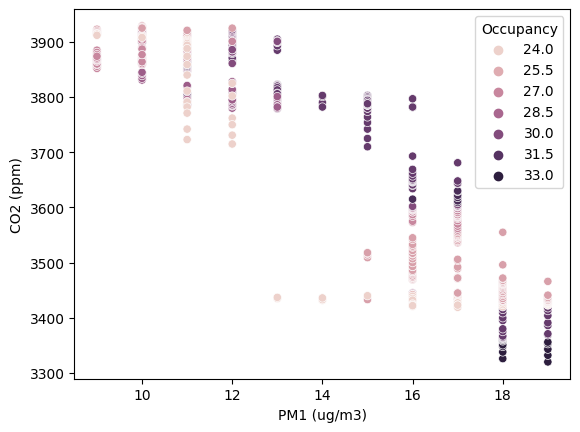

In [16]:
sns.scatterplot(data= data, x=data['PM1 (ug/m3)'],y=data['CO2 (ppm)'],hue='Occupancy')

<Axes: xlabel='Timestamp', ylabel='CO2 (ppm)'>

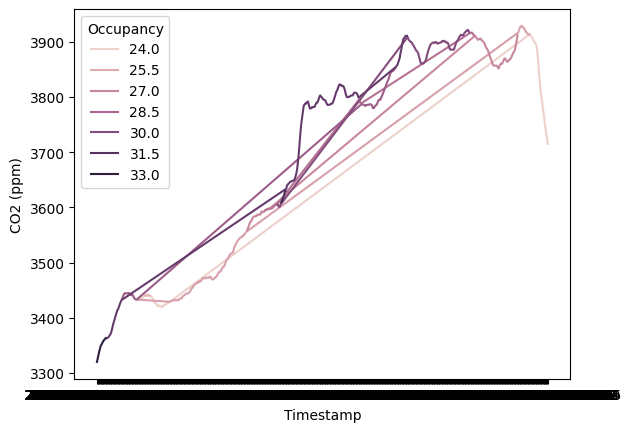

In [17]:
sns.lineplot(x=data['Timestamp'],y=data['CO2 (ppm)'],hue=data['Occupancy'])

<Axes: xlabel='Occupancy', ylabel='Position'>

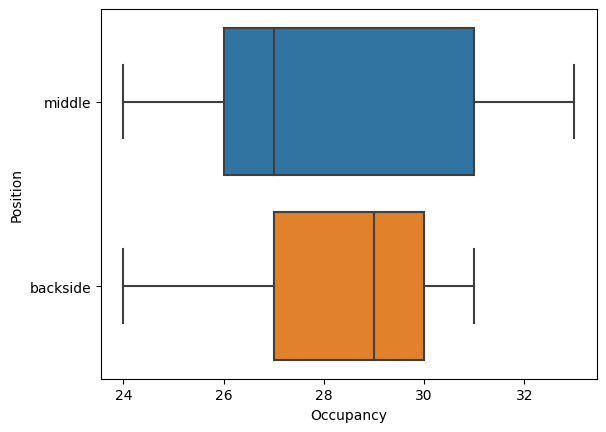

In [18]:
sns.boxplot(x=data['Occupancy'],y=data['Position'])

C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


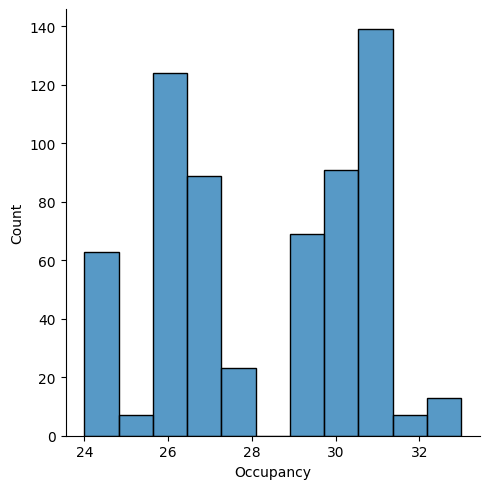

In [19]:
sns.displot(x=data['Occupancy'])

<Axes: xlabel='Occupancy', ylabel='TVOC (ppb)'>

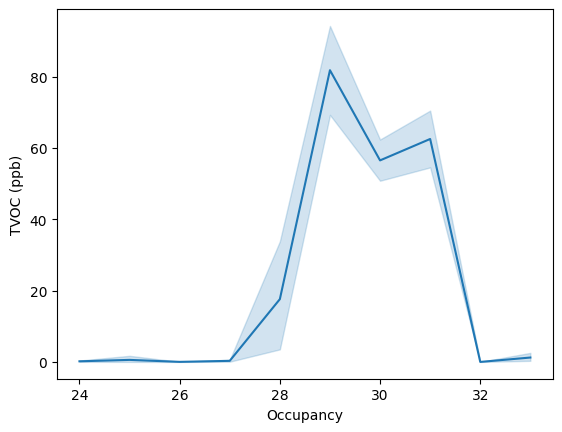

In [20]:
sns.lineplot(x=data["Occupancy"],y=data['TVOC (ppb)'])

<Axes: xlabel='Occupancy', ylabel='CO2 (ppm)'>

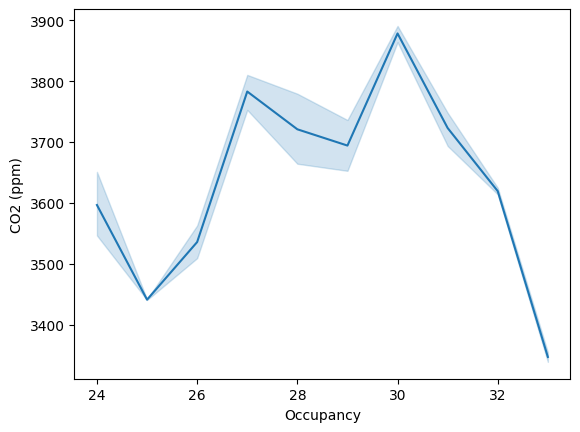

In [21]:
sns.lineplot(x=data['Occupancy'],y=data['CO2 (ppm)'],data= data)

<Axes: xlabel='Timestamp', ylabel='PM10 (ug/m3)'>

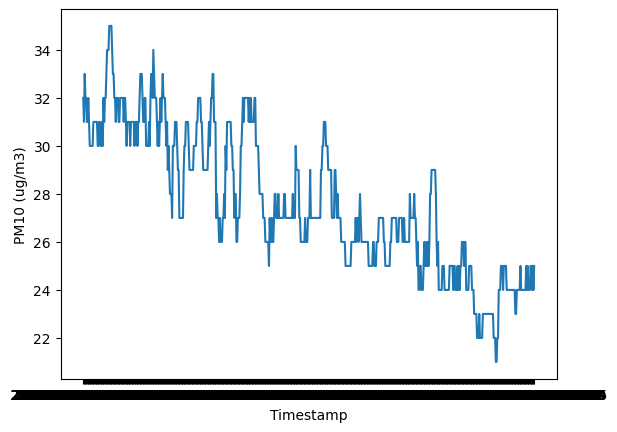

In [31]:
sns.lineplot(x=data['Timestamp'], y=data['PM10 (ug/m3)'])

<Axes: xlabel='Occupancy', ylabel='PM10 (ug/m3)'>

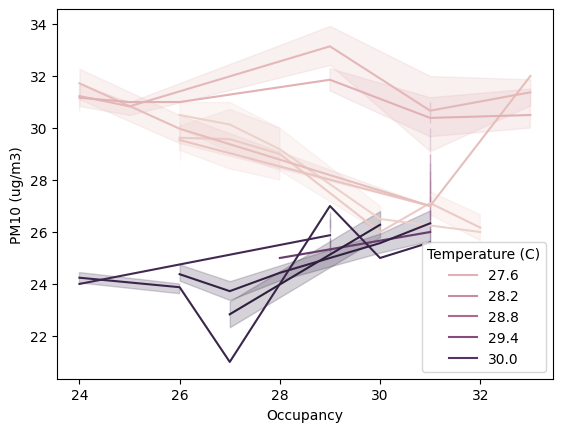

In [30]:
sns.lineplot(x=data['Occupancy'],y=data['PM10 (ug/m3)'],hue=data['Temperature (C)'])

<Axes: xlabel='Occupancy', ylabel='PM1 (ug/m3)'>

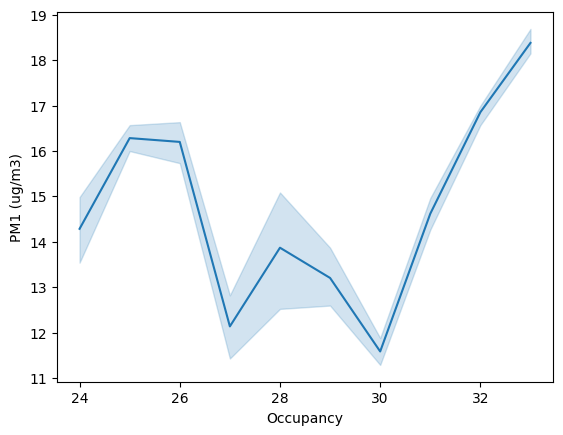

In [23]:
sns.lineplot(x=data['Occupancy'],y=data['PM1 (ug/m3)'])

<Axes: xlabel='Occupancy', ylabel='PM2.5 (ug/m3)'>

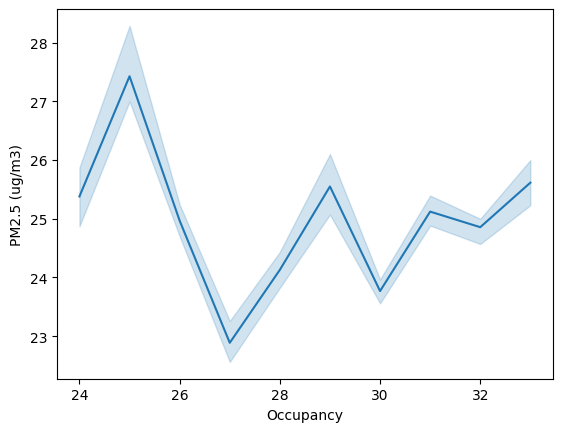

In [24]:
sns.lineplot(x=data['Occupancy'],y=data['PM2.5 (ug/m3)'])

In [25]:
try_data= data[['PM1 (ug/m3)']+['PM2.5 (ug/m3)']+['PM10 (ug/m3)']+['Occupancy']]

In [26]:
try_data.shape

(625, 4)

C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


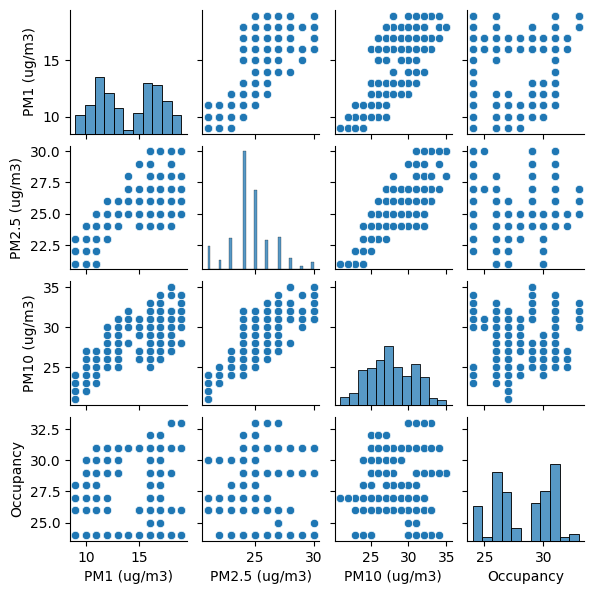

In [27]:
sns.pairplot(data=try_data,height=1.5)

C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


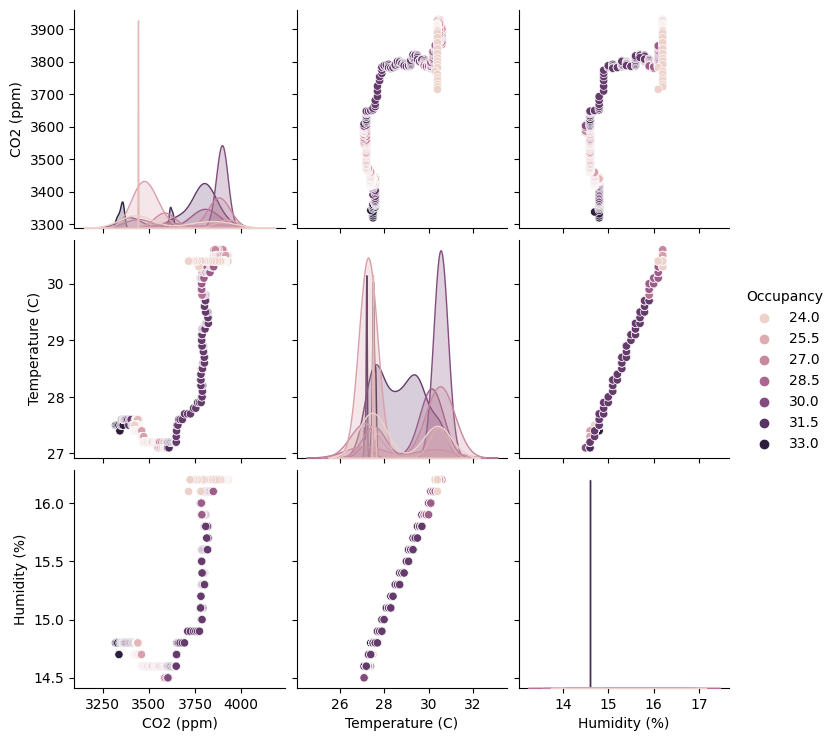

In [28]:
try_data1 = data[['CO2 (ppm)']+['Temperature (C)']+['Humidity (%)']+['Occupancy']]
sns.pairplot(data=try_data1,hue = 'Occupancy')

C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


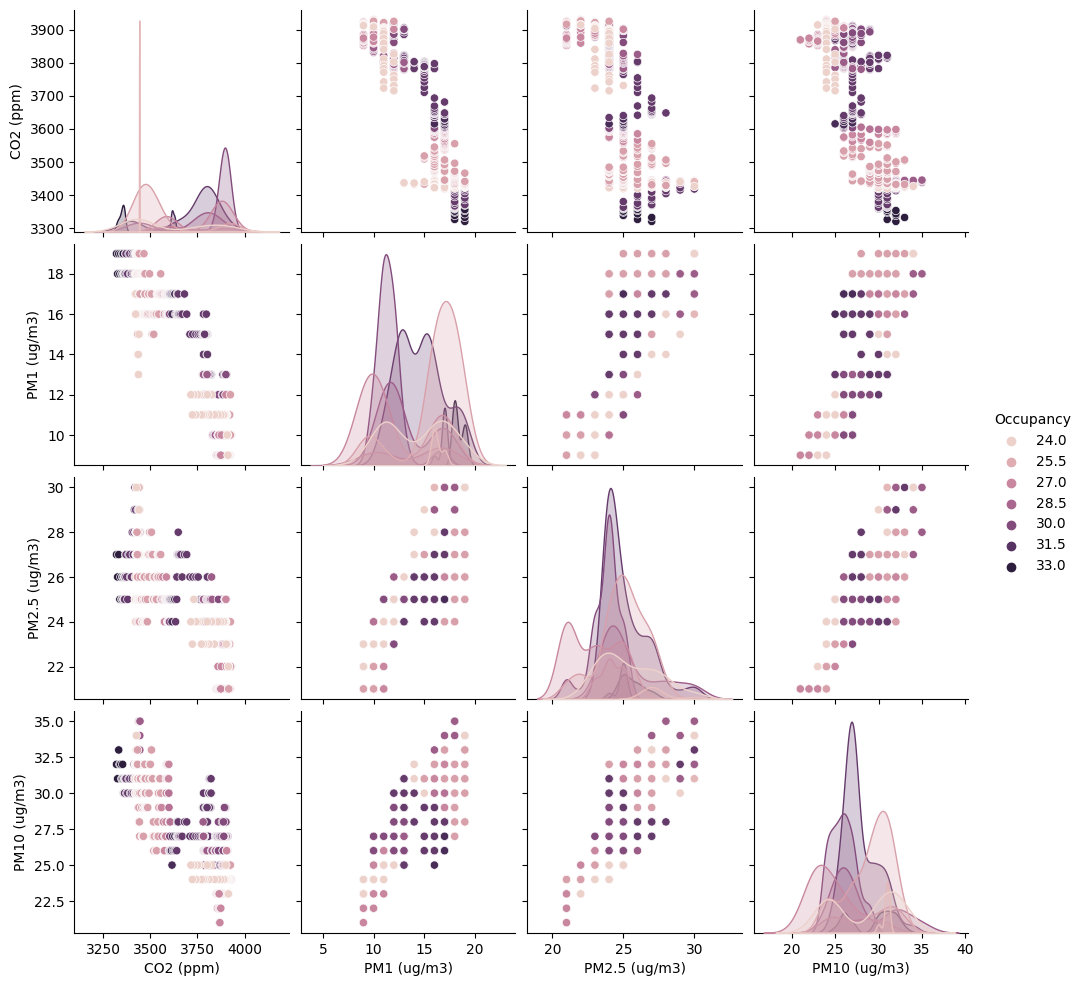

In [29]:
try_data2 = data[['CO2 (ppm)']+['PM1 (ug/m3)']+['PM2.5 (ug/m3)']+['PM10 (ug/m3)']+['Occupancy']]
sns.pairplot(data= try_data2,hue='Occupancy')